In [217]:
pwd

'D:\\IIT BOMBAY\\May 2025\\Maharashtra simulations'

In [218]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("bmh")

In [219]:
costs = pd.read_csv("D:\\IIT BOMBAY\\May 2025\\Maharashtra simulations\\costs.csv", encoding='unicode_escape')

In [220]:
costs.head()

,Technology,Lifetime (years),VOM (cr. ?/MWh),Marginal Cost (cr. ?/MWh),Capital Cost (cr. ?/MW·a)
0,BESS,10,0.000004,0.000004,1.206
1,PHES,50,0.000004,0.000004,0.696
2,biomass,25,0.000034,0.000034,0.630
3,coal,30,0.000014,0.000014,1.064
4,gas,30,0.000019,0.000019,0.478


In [221]:
defaults = {
    "FOM": 0,
    "VOM": 0,
    "efficiency": 1,
    "fuel": 0,
    "investment": 0,
    "lifetime": 25,
    "CO2 intensity": 0,
    "discount rate": 0.095,
}

In [222]:
path= r"D:\IIT BOMBAY\February 2025\Statewise Data\Maharashtra\timeseries_2023.xlsx"

In [223]:
# path= r"D:\IIT BOMBAY\March 2025\timeseries_2023.xlsx"

In [224]:
ts=pd.read_excel(path, index_col=0, parse_dates=True)

C:\Anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

C:\Anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



In [225]:
ts.head()

,load,wind,solar,poa,temperature,windspeed
timestamp,,,,,,
2023-01-01 00:00:00,19025.35,0.340,0.0,0.0,17.00,4.8
2023-01-01 01:00:00,19347.82,0.344,0.0,0.0,16.51,4.8
2023-01-01 02:00:00,19285.98,0.289,0.0,0.0,16.07,4.8
2023-01-01 03:00:00,19319.33,0.114,0.0,0.0,15.67,4.7
2023-01-01 04:00:00,19637.19,0.035,0.0,0.0,15.29,4.6


In [226]:
resolution = 1
ts = ts.resample(f"{resolution}h").first()

In [227]:
n=pypsa.Network()

In [228]:
n.add('Bus','electricity')

Index(['electricity'], dtype='object')

In [229]:
n.set_snapshots(ts.index)
n.snapshots

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               ...
               '2023-12-31 14:00:00', '2023-12-31 15:00:00',
               '2023-12-31 16:00:00', '2023-12-31 17:00:00',
               '2023-12-31 18:00:00', '2023-12-31 19:00:00',
               '2023-12-31 20:00:00', '2023-12-31 21:00:00',
               '2023-12-31 22:00:00', '2023-12-31 23:00:00'],
              dtype='datetime64[ns]', name='snapshot', length=8760, freq='h')

In [230]:
n.snapshot_weightings.loc[:, :] = resolution

In [231]:
carriers = ['Coal', 'Gas', 'Hydro', 'Biomass', 'Solar', 'Wind', 'Nuclear']

n.add(
    "Carrier",
    carriers,
    color=['#36454F','#e6daa6','#13eac9','#8A9A5B','#ffff00','#c0c0c0','#a9561e'],
)

Index(['Coal', 'Gas', 'Hydro', 'Biomass', 'Solar', 'Wind', 'Nuclear'], dtype='object')

In [232]:
n.add(
    "Load",
    "demand",
    bus="electricity",
    p_set=ts.load,
)

Index(['demand'], dtype='object')

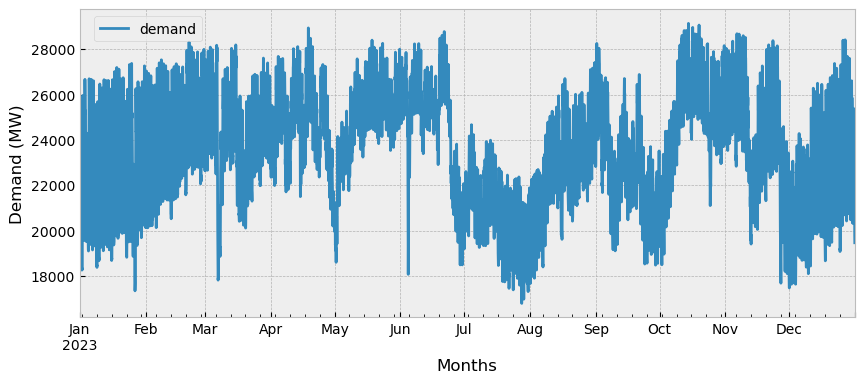

In [233]:
n.loads_t.p_set.plot(figsize=(10, 4), ylabel="Demand (MW)", xlabel="Months",)
plt.legend(loc='upper left', bbox_to_anchor=(0.01, 1.00))  # Adjust (x, y) for better positioning
plt.savefig("Demand_2023.png")

In [234]:
n.add(
    "Generator",
    "coal",
    bus="electricity",
    carrier="coal",
    capital_cost=4.047,
    marginal_cost=9.30,
    efficiency=30,
    p_nom_extendable= False,
    p_nom_min= 24006.01,
    lifetime=30,
)

Index(['coal'], dtype='object')

In [235]:
n.add(
    "Generator",
    "gas",
    bus="electricity",
    carrier="gas",
    capital_cost=1.339,
    marginal_cost=2.1,
    efficiency=44,
    p_nom_extendable= False,
    p_nom_min= 3207.08,
    lifetime=30
)

Index(['gas'], dtype='object')

In [236]:
n.add(
    "Generator",
    "hydro",
    bus="electricity",
    carrier="hydro",
    capital_cost=3.241,
    marginal_cost=0,
    efficiency=92,
    p_nom_extendable=True,
    p_nom_min= 3429.28,
    lifetime=50
)

Index(['hydro'], dtype='object')

In [237]:
n.add(
    "Generator",
    "nuclear",
    bus="electricity",
    carrier="nuclear",
    capital_cost=6.304,
    marginal_cost=2.67,
    efficiency=33,
    p_nom_extendable=True,
    p_nom_min= 1400,
    lifetime=50
)

Index(['nuclear'], dtype='object')

In [238]:
n.add(
    "Generator",
    "biomass",
    bus="electricity",
    carrier="biomass",
    capital_cost=5.341,
    marginal_cost=5.2,
    efficiency=24,
    p_nom_extendable=True,
    p_nom_min= 2643.19,
    lifetime=25
)

Index(['biomass'], dtype='object')

In [239]:
for tech in ["solar"]:
    n.add(
        "Generator",
        tech,
        bus="electricity",
        carrier=tech,
        p_max_pu=ts[tech],
        capital_cost=1.611,
        marginal_cost=0,
        efficiency=20,
        p_nom_extendable=True,
        p_nom_min= 6249.67,
        lifetime=25
    )

In [240]:
for tech in ["wind"]:
    n.add(
        "Generator",
        tech,
        bus="electricity",
        carrier=tech,
        p_max_pu=ts[tech],
        capital_cost=1.777,
        marginal_cost=0,
        efficiency=42,
        p_nom_extendable=True,
        p_nom_min= 5207.98,
        lifetime=25
    )

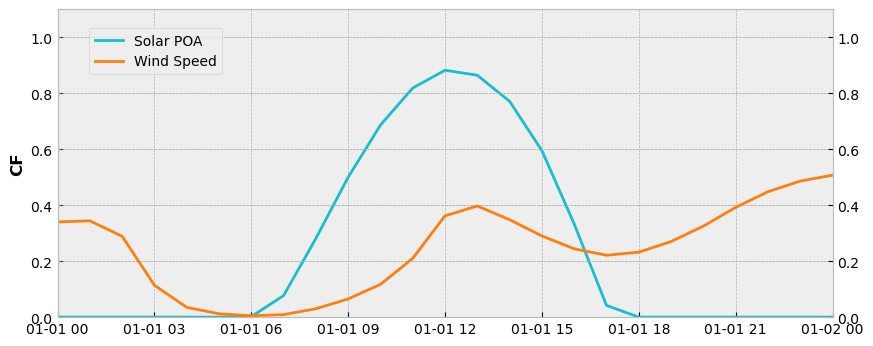

In [241]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-01-02'))
# Plot solar POA on the left y-axis
color='tab:cyan'
ax1.plot(ts.index, ts["solar"], label="Solar POA",color=color)
ax1.set_ylabel("CF",weight='bold')
ax1.tick_params(axis="y")

# Create a second y-axis (right side)
color='tab:orange'
ax2 = ax1.twinx()
ax2.plot(ts.index, ts["wind"], label="Wind Speed",color=color)
# ax2.set_ylabel("Wind Speed (m/s)", weight='bold')
ax2.tick_params(axis="y")

ax1.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85))  # Adjust (x, y) for better positioning

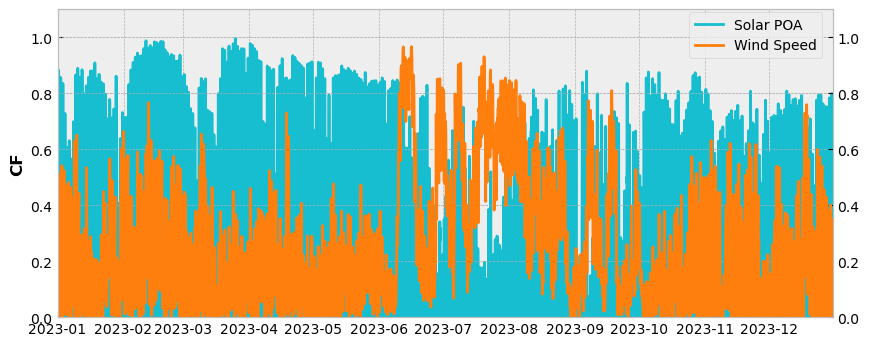

In [242]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-12-31'))
# Plot solar POA on the left y-axis
color='tab:cyan'
ax1.plot(ts.index, ts["solar"], label="Solar POA",color=color)
ax1.set_ylabel("CF",weight='bold')
ax1.tick_params(axis="y")

# Create a second y-axis (right side)
color='tab:orange'
ax2 = ax1.twinx()
ax2.plot(ts.index, ts["wind"], label="Wind Speed",color=color)
# ax2.set_ylabel("Wind Speed (m/s)", weight='bold')
ax2.tick_params(axis="y")

ax1.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)
fig.legend(loc='upper left', bbox_to_anchor=(0.75, 0.89))  # Adjust (x, y) for better positioning

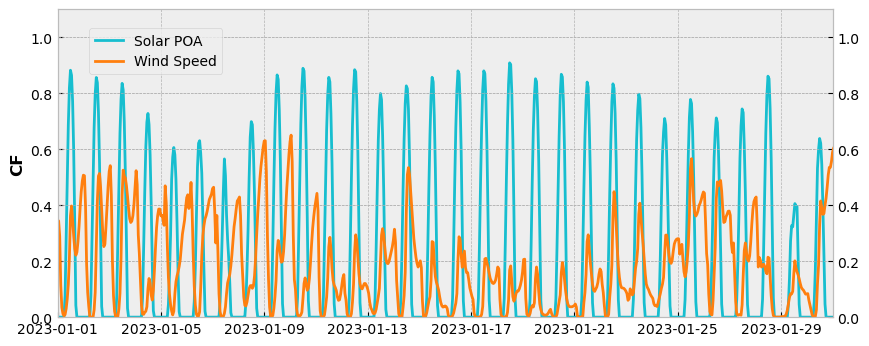

In [243]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 4))
ax1.set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-01-31'))
# Plot solar POA on the left y-axis
color='tab:cyan'
ax1.plot(ts.index, ts["solar"], label="Solar POA",color=color)
ax1.set_ylabel("CF",weight='bold')
ax1.tick_params(axis="y")

# Create a second y-axis (right side)
color='tab:orange'
ax2 = ax1.twinx()
ax2.plot(ts.index, ts["wind"], label="Wind Speed",color=color)
# ax2.set_ylabel("Wind Speed (m/s)", weight='bold')
ax2.tick_params(axis="y")

ax1.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85))  # Adjust (x, y) for better positioning

In [244]:
n.optimize(solver_name="highs")

Index(['coal', 'gas', 'hydro', 'nuclear', 'biomass', 'solar', 'wind'], dtype='object', name='Generator')
Index(['electricity'], dtype='object', name='Bus')
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|█████████████████████████████████████████████████████| 2/2 [00:00<00:00, 12.32it/s]
INFO:linopy.io: Writing time: 1.0s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 61325 primals, 131405 duals
Objective: 1.32e+05
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper were not assigned to the network.


('ok', 'optimal')

In [245]:
n.objective #(Total system cost in cr.₹ per year)

132474.4140918605

In [246]:
n.generators.p_nom_opt.div(1e3)  # (Total optimised capacity in GW)

Generator
coal        0.000000
gas         0.000000
hydro      27.458258
nuclear     1.400000
biomass     2.643190
solar       6.249670
wind        5.207980
Name: p_nom_opt, dtype: float64

<Axes: ylabel='p_nom_opt'>

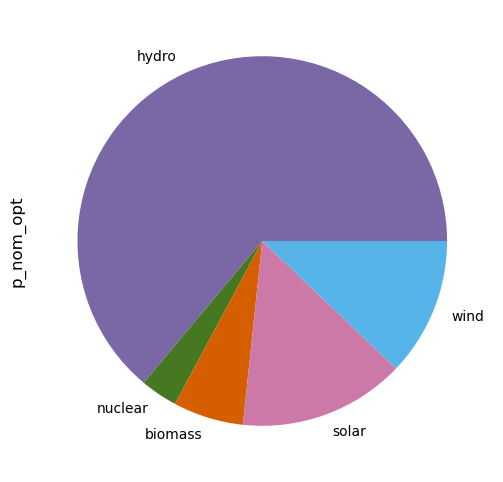

In [247]:
n.generators.p_nom_opt.div(1e3).plot.pie(figsize=(6,6))

In [248]:
n.snapshot_weightings.generators @ n.generators_t.p.div(1e3)  # (Total energy generation in GWh units)

Generator
coal            0.000000
gas             0.000000
hydro      184689.988093
nuclear         0.455627
biomass         0.000000
solar       10913.345111
wind        10753.344570
Name: generators, dtype: float64

In [249]:
(n.statistics.capex() + n.statistics.opex())

component  carrier
Generator  biomass            NaN
           hydro              NaN
           nuclear    10042.12422
           solar              NaN
           wind               NaN
dtype: float64

In [360]:
def plot_dispatch(n, time='2023-12'):
    p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)

    if not n.storage_units.empty:
        sto = n.storage_units_t.p.T.groupby(n.storage_units.carrier).sum().T.div(1e3)
        p_by_carrier = pd.concat([p_by_carrier, sto], axis=1)

    fig, ax = plt.subplots(figsize=(10, 4))

    color = p_by_carrier.columns.map(n.carriers.color)

    p_by_carrier.where(p_by_carrier > 0).loc[time].plot.area(
        ax=ax,
        linewidth=0
        #color=color
    )

    charge = p_by_carrier.where(p_by_carrier < 0).dropna(how="all", axis=1).loc[time]

    if not charge.empty:
        charge.plot.area(
            ax=ax,
            linewidth=0
            #color=charge.columns.map(n.carriers.color),
        )

    n.loads_t.p_set.sum(axis=1).loc[time].div(1e3).plot(ax=ax, c="k")

    plt.legend(loc=(1.05, 0))
    ax.set_ylabel("GW")
    ax.set_ylim(-15, 40)

C:\Users\sumit\AppData\Local\Temp\ipykernel_9548\378898098.py:2: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



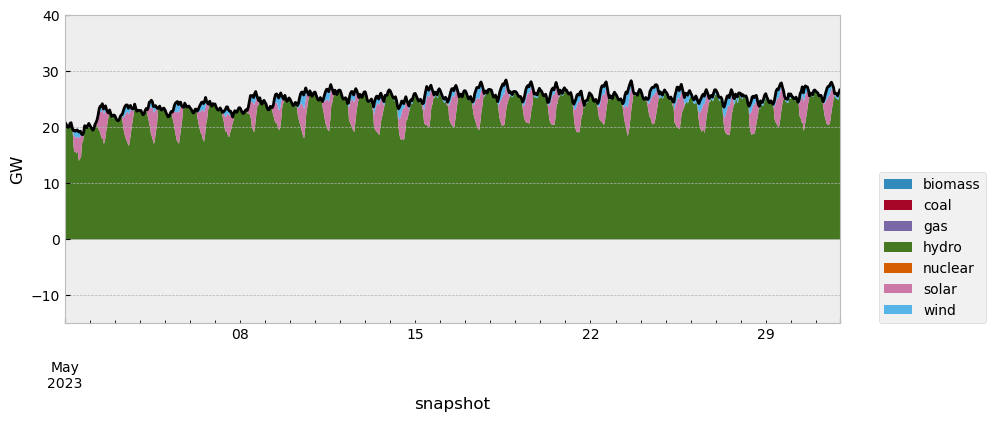

In [251]:
plot_dispatch(n)

In [252]:
n.add(
    "StorageUnit",
    "BESS",
    bus="electricity",
    carrier="battery storage",
    max_hours=4,
    capital_cost=1.278,
    marginal_cost=0,
    p_nom_extendable=True,
    p_nom_min=0,
    cyclic_state_of_charge=True,
    lifetime=10
)

Index(['BESS'], dtype='object')

In [253]:
n.add(
    "StorageUnit",
    "PHES",
    bus="electricity",
    carrier="PHES",
    max_hours=6,
    capital_cost= 1.822,
    marginal_cost= 0.58,
    p_nom_extendable=True,
    cyclic_state_of_charge=True,
    p_nom_min=400,
    lifetime=50
)

Index(['PHES'], dtype='object')

In [254]:
n.optimize(solver_name="highs")

Index(['BESS', 'PHES'], dtype='object', name='StorageUnit')
Index(['coal', 'gas', 'hydro', 'nuclear', 'biomass', 'solar', 'wind'], dtype='object', name='Generator')
Index(['electricity'], dtype='object', name='Bus')
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|█████████████████████████████████████████████████████| 6/6 [00:00<00:00, 18.43it/s]
INFO:linopy.io: Writing time: 2.06s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 113887 primals, 254047 duals
Objective: 1.28e+05
Solver model: available
Solver message: optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, StorageUnit-ext-p_dispatch-lower, StorageUnit-ext-p_dispatch-upper, StorageUnit-ext-p_store-lower, StorageUnit-ext-p_store-upper, StorageUnit-ext-state_of_charge-lower, StorageUnit-

('ok', 'optimal')

In [255]:
n.generators.p_nom_opt.div(1e3)  # (Total optimised capacity in GW)

Generator
coal        0.000000
gas         0.000000
hydro      25.103794
nuclear     1.400000
biomass     2.643190
solar       6.249670
wind        5.207980
Name: p_nom_opt, dtype: float64

In [256]:
n.snapshot_weightings.generators @ n.generators_t.p.div(1e3)  # (Total energy generation in GWh units)

Generator
coal            0.000000
gas             0.000000
hydro      184529.234503
nuclear         0.000000
biomass         0.000000
solar       10982.993959
wind        10844.904938
Name: generators, dtype: float64

In [257]:
n.storage_units.p_nom_opt.div(1e3) # GW

StorageUnit
BESS    2.810091
PHES    0.400000
Name: p_nom_opt, dtype: float64

In [258]:
n.storage_units.p_nom_opt.div(1e3) * n.storage_units.max_hours  # GWh

StorageUnit
BESS    11.240364
PHES     2.400000
dtype: float64

In [259]:
def system_cost(n):
    tsc = n.statistics.capex() + n.statistics.opex()
    return tsc.droplevel(0)  # cr.₹

In [260]:
system_cost(n)

carrier
biomass           NaN
hydro             NaN
nuclear           NaN
solar             NaN
wind              NaN
PHES              NaN
battery storage   NaN
dtype: float64

C:\Users\sumit\AppData\Local\Temp\ipykernel_9548\2150603614.py:2: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

C:\Anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1794: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



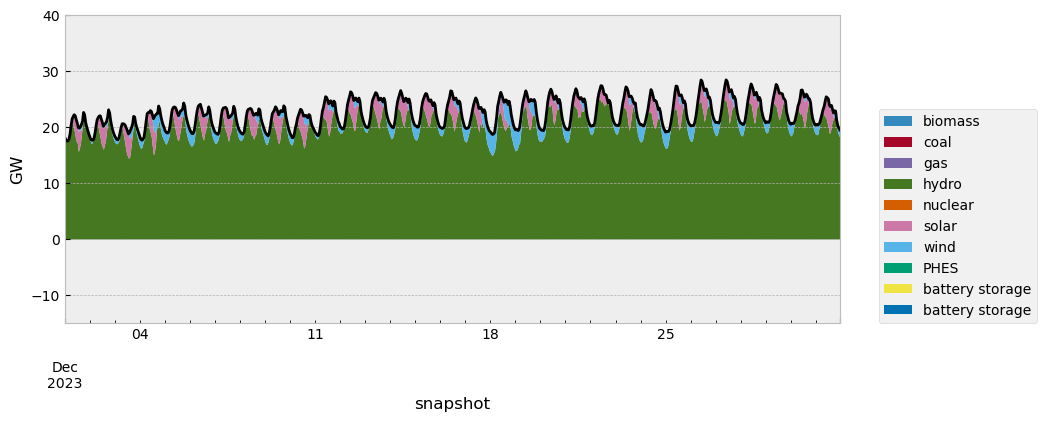

In [362]:
plot_dispatch(n)

In [262]:
def capex_cost(n):
    tsc = n.statistics.capex()
    return tsc.droplevel(0)  # million $

In [263]:
capex_cost (n)

carrier
PHES                 728.80000
battery storage     3591.29633
biomass            14117.27779
hydro              81361.39550
nuclear             8825.60000
solar              10068.21837
wind                9254.58046
dtype: float64

In [264]:
def opex_cost(n):
    tsc = n.statistics.opex()
    return tsc.droplevel(0)  # cr.₹

In [265]:
opex_cost(n)

Series([], dtype: float64)